In [39]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import re

figure_path = '/home/weiss/git/thesis/doc/figures/'

In [40]:
def show_vis(type):
    dirs = next(os.walk('log/' + type))[1]
    dirs = ['log/' + type + '/' + d + '/' for d in dirs]

    for d in dirs:
        try:
            #print(glob( d + 'train*'))
            train_loss = pd.read_csv(glob( d + 'train*')[0])
            val_loss = pd.read_csv(glob( d + 'val*')[0])
            test_loss = pd.read_csv(glob( d + 'test*')[0])


            # sampling is special because epochs are represented per mini-batch...
            # e.g., 10 mio * 0.6 (train ratio) / 4096 (bs) = 1464.84375
            if d == 'log/sample/ml-10m_YN/':
                train_loss = train_loss.iloc[::1465, :]
                train_loss['iter'] = train_loss['iter'].apply(lambda x: x // 1465)

                val_loss = pd.read_csv(glob( d + 'val*')[0])
                val_loss['iter'] = val_loss['iter'].apply(lambda x: x // 1465)
            elif d == 'log/sample/ml-100k_QJ/':
                train_loss = train_loss.iloc[::16, :]
                train_loss['iter'] = train_loss['iter'].apply(lambda x: x // 16)

                val_loss = pd.read_csv(glob( d + 'val*')[0])
                val_loss['iter'] = val_loss['iter'].apply(lambda x: x // 16)
            elif d == 'log/sample/ml-1m_PC/':
                train_loss = train_loss.iloc[::156, :]
                train_loss['iter'] = train_loss['iter'].apply(lambda x: x // 156)
                print(train_loss)

                val_loss = pd.read_csv(glob( d + 'val*')[0])
                val_loss['iter'] = val_loss['iter'].apply(lambda x: x // 156)
                print(val_loss)

            regex = r"log/" + re.escape(type) + r"/(.*)_.*"
            model_name = re.findall(regex, d)[0]

            plt.rcParams['font.size'] = 26
            plt.rcParams['axes.labelsize'] = 26
            plt.rcParams['xtick.labelsize'] = 26
            plt.rcParams['ytick.labelsize'] = 26
            plt.rcParams['legend.fontsize'] = 26
            plt.plot('iter', 'rmse', data=train_loss, label='train')
            plt.plot('iter', 'rmse', data=val_loss, label='val')
            plt.xlabel("epoch")
            plt.ylabel("loss")
            plt.legend()
            plt.style.use('seaborn-whitegrid')
            plt.ylim([0.2, 1.8])
            plt.savefig(figure_path + '/' + model_name + '-gcmc-' + type +'-loss.png', dpi=300, bbox_inches='tight')
            plt.show()
            print('Final RMSE:\n', model_name, test_loss[test_loss['rmse'] == test_loss['rmse'].min()])

        except Exception as e:
            print(e)

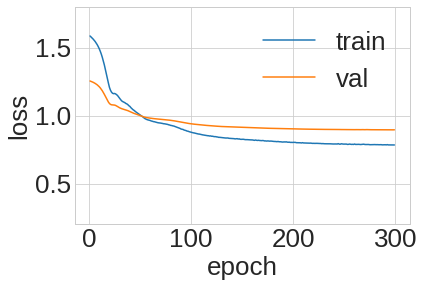

Final RMSE:
 ml-1m      iter   rmse
246   298  0.897
Final RMSE:
 ml-10m     iter    rmse
28    29  1.0698
Final RMSE:
 ml-100k      iter    rmse
194   295  0.9197


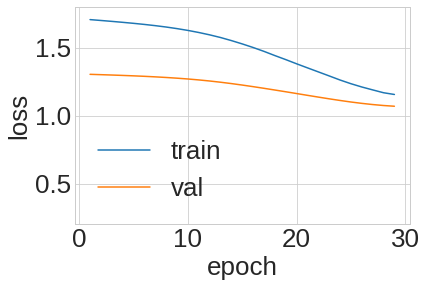

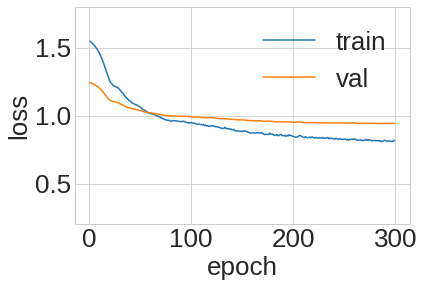

In [41]:
type='stack'
show_vis(type)

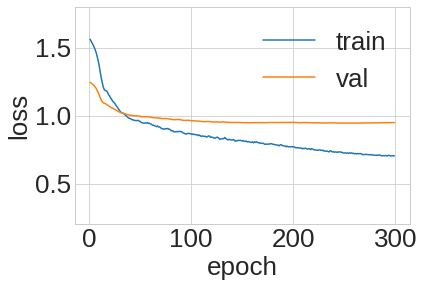

Final RMSE:
 ml-100k      iter    rmse
133   245  0.9138
Final RMSE:
 ml-1m      iter    rmse
192   299  0.8801
Final RMSE:
 ml-10m     iter   rmse
28    29  1.166


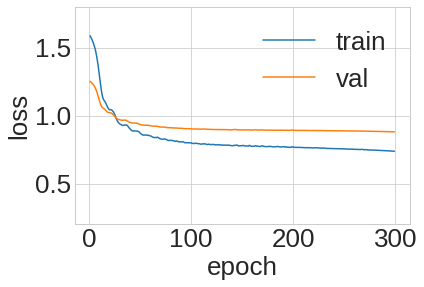

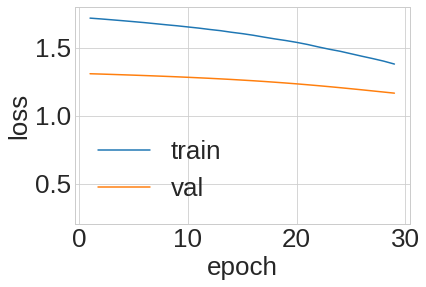

In [42]:
type='sum'
show_vis(type)

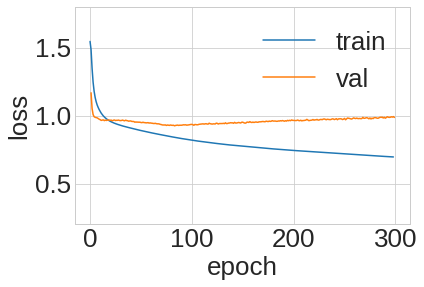

Final RMSE:
 ml-100k     iter    rmse
36  1329  0.9227
Final RMSE:
 ml-10m      iter    rmse
18  34387  0.8127
19  35950  0.8127
       iter    loss    rmse
0         0  0.8045  1.6254
156       1  1.4540  1.1794
312       2  1.3748  1.0282
468       3  1.3381  0.9639
624       4  1.3158  0.9276
...     ...     ...     ...
46176   296  0.9936  0.5733
46332   297  0.9932  0.5729
46488   298  0.9928  0.5726
46644   299  0.9924  0.5722
46800   300  0.9920  0.5719

[301 rows x 3 columns]
     iter    rmse
0       1  0.9704
1       2  0.9302
2       3  0.9186
3       4  0.9107
4       5  0.9066
..    ...     ...
294   296  0.9417
295   297  0.9442
296   298  0.9409
297   299  0.9426
298   300  0.9430

[299 rows x 2 columns]
Final RMSE:
 ml-1m     iter    rmse
28  7223  0.8687


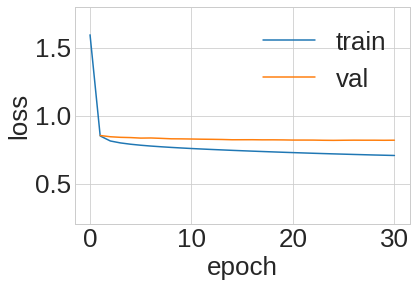

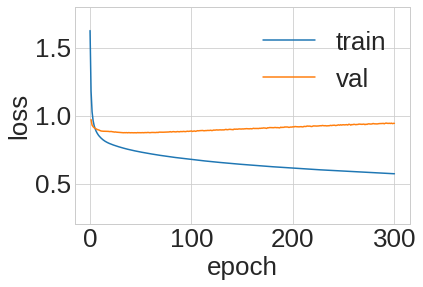

In [43]:
type='sample'
show_vis(type)
# special because epochs are represented as mini-batch epochs...show_vis(type)